

## Importing dependencies



In [1]:
#For Data collecting and Cleaning
import pandas as pd
import numpy as np

#For Preprocessing
import re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#For Datavisualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Model Creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Collecting Data

In [2]:
df = pd.read_csv('Twitter_Data.csv')

In [3]:
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


## Cleaning and Preparaing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [5]:
df.describe(include='all')

,clean_text,category
count,162976,162973.000000
unique,162976,NaN
top,when modi promised “minimum government maximum...,NaN
freq,1,NaN
mean,NaN,0.225436
std,NaN,0.781279
min,NaN,-1.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


In [6]:
df['category'] = df['category'].map({-1.0:'Negative',0.0:'Neutral', 1.0:'Positive'})

In [7]:
df["category"].value_counts()

Positive    72250
Neutral     55213
Negative    35510
Name: category, dtype: int64

In [8]:
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

## Exploratory Data Analysis (EDA)

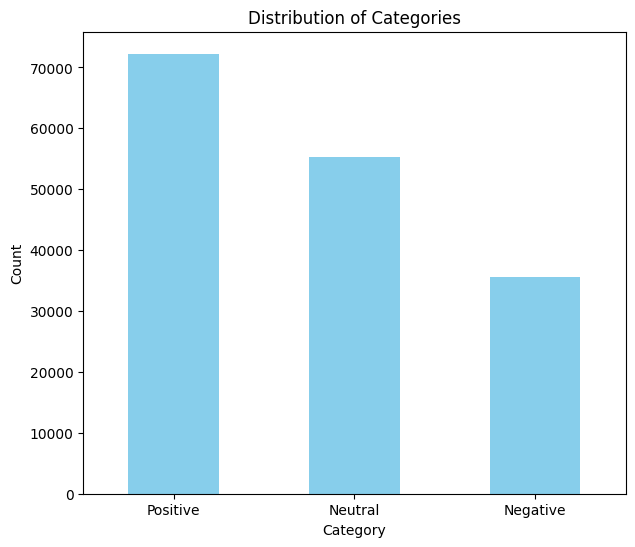

In [11]:
category_count = df["category"].value_counts()
plt.figure(figsize=(7,6))
category_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

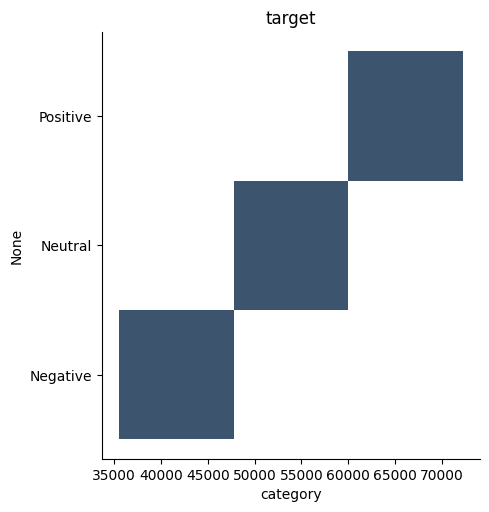

In [12]:
locations_vc = df["category"].value_counts()
sns.displot(y=locations_vc.index, x=locations_vc)
plt.title("target")
plt.show()

<Axes: xlabel='clean_text', ylabel='Density'>

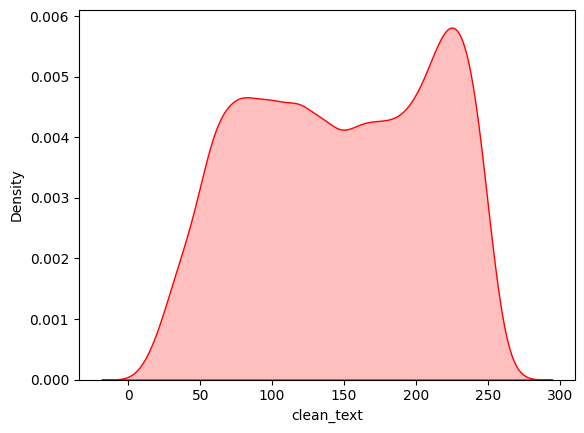

In [13]:
sns.kdeplot(df[df['category'] == "Negative"]['clean_text'].str.len(), fill=True, color='red')

<Axes: xlabel='clean_text', ylabel='Density'>

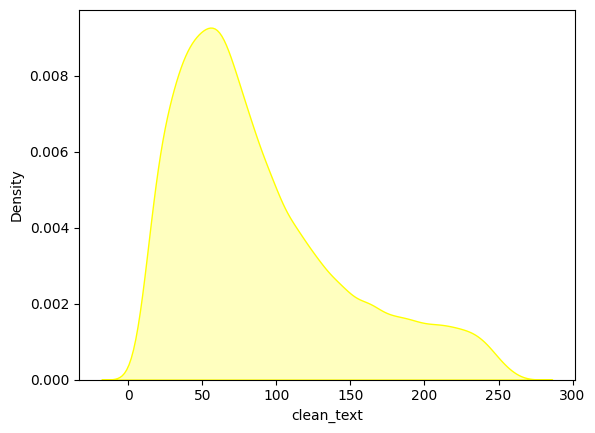

In [14]:
sns.kdeplot(df[df['category'] == "Neutral"]['clean_text'].str.len(), fill=True, color='yellow')

<Axes: xlabel='clean_text', ylabel='Density'>

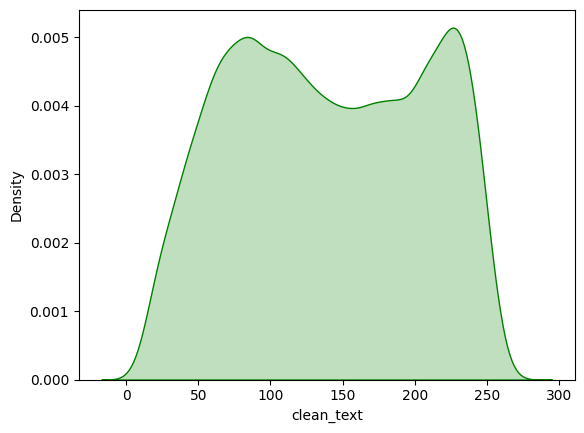

In [15]:
sns.kdeplot(df[df['category'] == "Positive"]['clean_text'].str.len(), fill=True, color='green')

In [16]:
import plotly.express as px
fig = px.pie(df, names='category', title ='Pie chart of different sentiments of tweets')
fig.show()

## Visualizing Data into Words

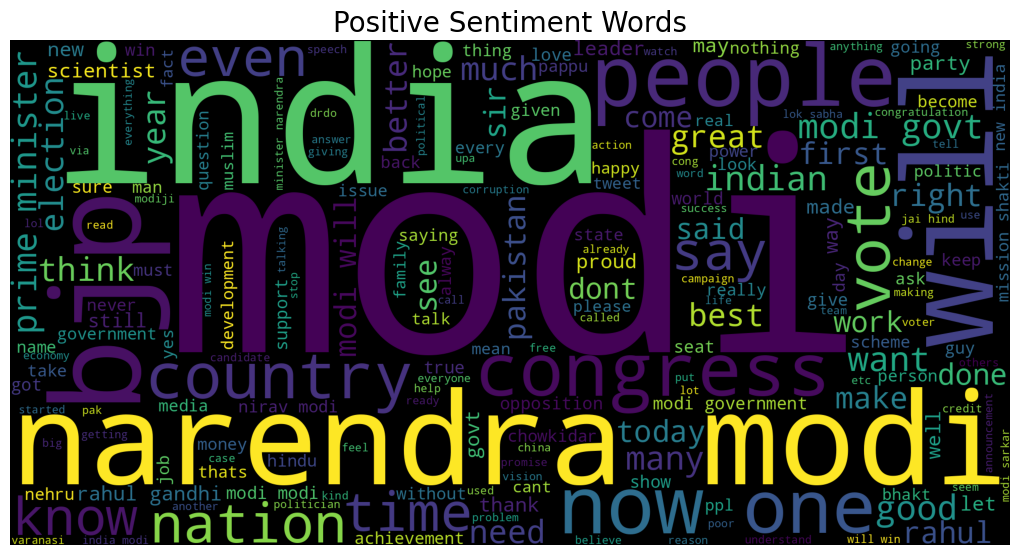

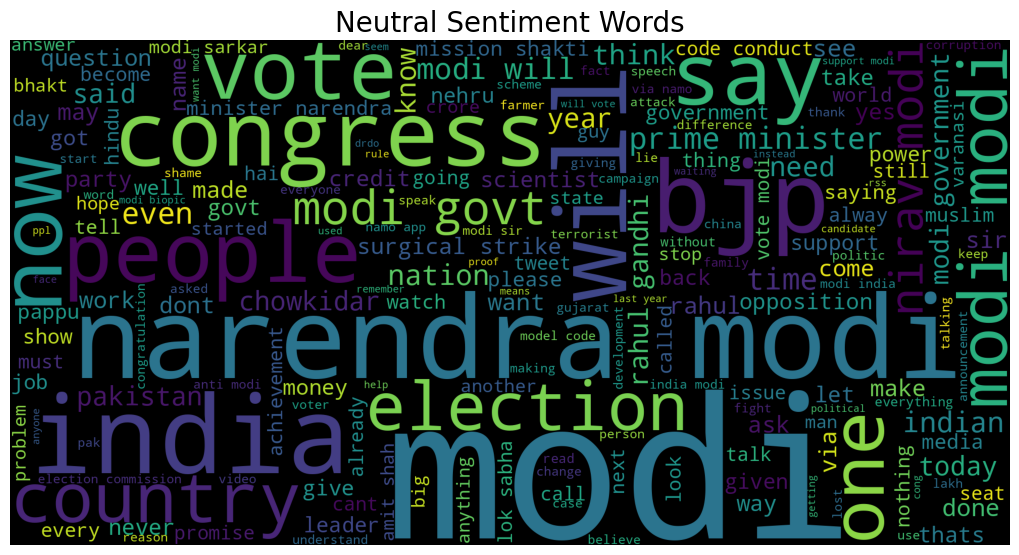

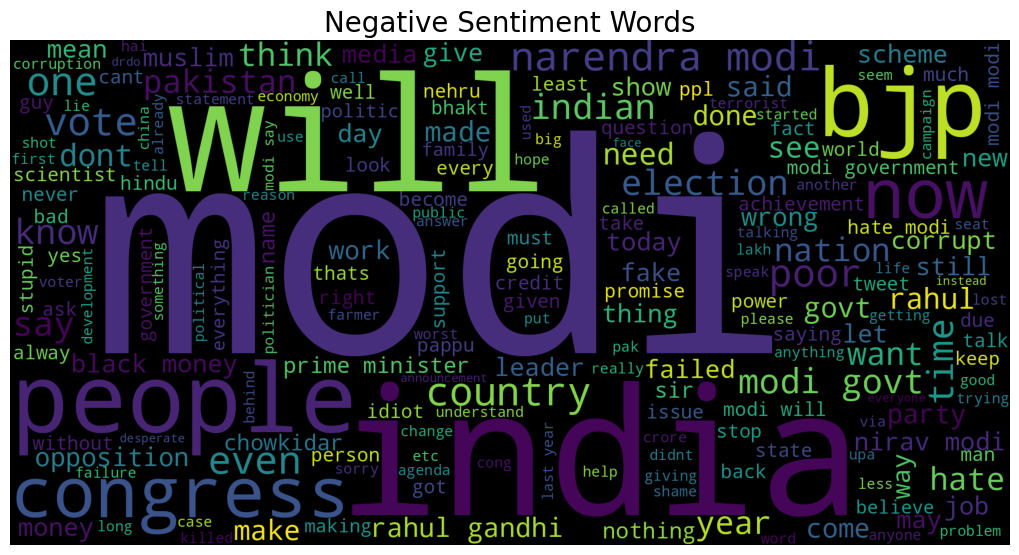

In [17]:
from wordcloud import WordCloud, STOPWORDS

def dataintowords(df, type):
  """
  Generating Word Cloud
  inputs:
        df -> comments dataset
        type -> whether positive or negative
  """
  #comnining all text with corresponding to type
  combine_comment = " ".join([comment for comment in df[df.category==type]['clean_text']])
  # Initialize wordcloud object
  wc = WordCloud(width=1980, height=1000 ,stopwords = STOPWORDS)

  # Generate and plot wordcloud
  plt.figure(figsize=(10,10))
  plt.imshow(wc.generate(combine_comment))
  plt.title('{} Sentiment Words'.format(type), fontsize=20)
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show();


# Positive tweet words
dataintowords(df, 'Positive')
# Neutral tweet words
dataintowords(df, 'Neutral')
# Negative tweet words
dataintowords(df, 'Negative')

## Data Preprocessing

In [18]:
def text_to_words(text):
    ''' Convert tweet text into a sequence of words '''
    # convert to lowercase
    text = text.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", text_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


In [19]:
# Apply data processing to each tweet
X = list(map(text_to_words, df['clean_text']))

In [20]:
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['clean_text'][0])
X, tokenizer = tokenize_pad_sequences(df['clean_text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
After Tokenization & Padding 
 [  42    1  307   66 1726 1119   40 2378    2 1211  205    2  215   32
  155  100   49   69 1068  215   50    3    6  546    3   50 4179    3
 2806    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


## Data Spliting

In [21]:
y = pd.get_dummies(df['category'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (97781, 50) (97781, 3)
Validation Set -> (32594, 50) (32594, 3)
Test Set -> (32594, 50) (32594, 3)


## Model

In [22]:
vocab_size = 5000
embedding_size = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=50),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Bidirectional( tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax'),

])

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])

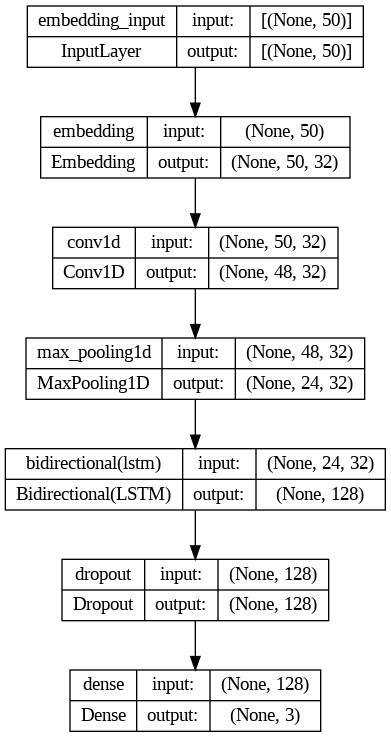

In [24]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            160000    
                                                                 
 conv1d (Conv1D)             (None, 48, 32)            3104      
                                                                 
 max_pooling1d (MaxPooling1  (None, 24, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 128)               49664     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 3)                 3

In [26]:
# Train model

batch_size = 64
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=5, verbose=1)

Epoch 1/5
1528/1528 [==============================] - 73s 45ms/step - loss: 0.3935 - accuracy: 0.8582 - val_loss: 0.2123 - val_accuracy: 0.9429
Epoch 2/5
1528/1528 [==============================] - 91s 60ms/step - loss: 0.2041 - accuracy: 0.9458 - val_loss: 0.1931 - val_accuracy: 0.9481
Epoch 3/5
1528/1528 [==============================] - 69s 45ms/step - loss: 0.1771 - accuracy: 0.9536 - val_loss: 0.1936 - val_accuracy: 0.9484
Epoch 4/5
1528/1528 [==============================] - 68s 45ms/step - loss: 0.1519 - accuracy: 0.9604 - val_loss: 0.1851 - val_accuracy: 0.9485
Epoch 5/5
1528/1528 [==============================] - 68s 45ms/step - loss: 0.1307 - accuracy: 0.9649 - val_loss: 0.1946 - val_accuracy: 0.9482



## Model Accuracy & Loss

In [27]:
# Evaluate model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy :  {:.4f}'.format(accuracy))
print('Loss :      {:.4f}'.format(loss))




Accuracy :  0.9502
Loss :      0.1913


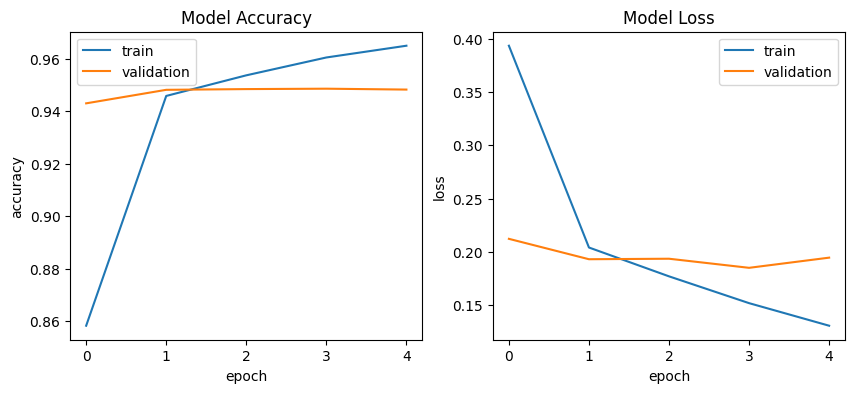

In [28]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

1019/1019 [==============================] - 10s 9ms/step


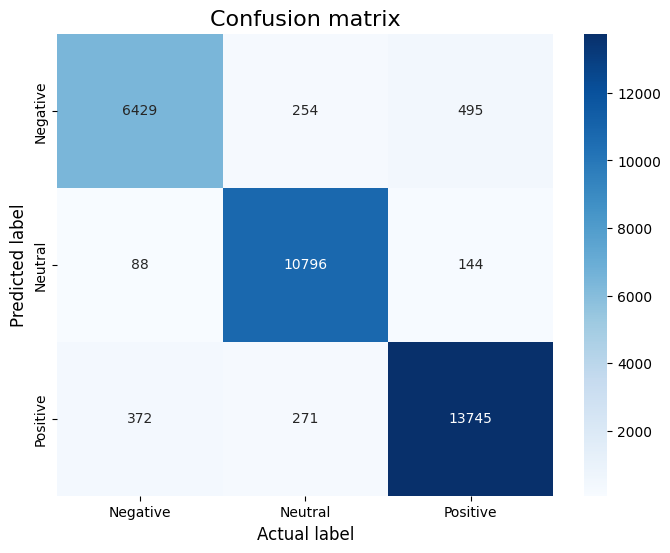

In [29]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):


    sentiment_classes = ['Negative', 'Neutral', 'Positive']

    y_pred = model.predict(X_test)

    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

## Model save and load for the prediction

In [31]:
# Save the model architecture & the weights
model.save('Twitter_sentiment_model.h5')
print('Best model saved')

Best model saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [32]:
from tf.keras.models import load_model

# Load model
model = load_model('Twitter_sentiment_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    max_len=50

    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [33]:
predict_class(['"I hate when I have to call and wake people up'])

1/1 [==============================] - 1s 863ms/step
The predicted sentiment is Negative


In [34]:
predict_class(['The food was meh'])

1/1 [==============================] - 0s 24ms/step
The predicted sentiment is Neutral


In [35]:
predict_class(['He is a best minister india ever had seen'])

1/1 [==============================] - 0s 25ms/step
The predicted sentiment is Positive
